# MATH3976 Project: SimpleCircuits.jl

David Rapisarda

SID: 440429320

Note: this has two dependencies - [DataStructures.jl](https://github.com/JuliaLang/DataStructures.jl) and [Sundials.jl](https://github.com/JuliaLang/Sundials.jl). 

In [1]:
include("SimpleCircuits.jl")
using SimpleCircuits
using PyPlot
versioninfo()

Julia Version 0.4.5
Commit 2ac304d (2016-03-18 00:58 UTC)
Platform Info:
  System: Linux (x86_64-linux-gnu)
  CPU: Intel(R) Core(TM) i5-4670 CPU @ 3.40GHz
  WORD_SIZE: 64
  BLAS: libopenblas (NO_LAPACK NO_LAPACKE DYNAMIC_ARCH NO_AFFINITY Haswell)
  LAPACK: liblapack.so.3
  LIBM: libopenlibm
  LLVM: libLLVM-3.3


In [2]:
SimpleCircuits.Tests.run_all_tests()

Running all tests ...

Test 'connection test 1 - construct circuit 1' passed.
Test 'connection test 2 - test circuit 1 connections' passed.
Test 'connection test 3 - test node_index' passed.
Test 'connection test 4 - test other_end' passed.
Test 'connection test 5 - test circuit 2 connections' passed.
Test 'connection test 6 - test disconnect!' passed.
Test 'operating point test 1' passed.
Test 'operating point test 2' passed.
Test 'operating point test 3' passed.
Test 'operating point test 4' passed.
Test 'operating point test 5' passed.
Test 'DCIV test 1 - test DCVoltageSource' passed.
Test 'DCIV test 2 - test DCCurrentSource' passed.
Test 'DCIV test 3 - test Resistor' passed.
Test 'DCIV test 4 - test Capacitor' passed.
Test 'DCIV test 5 - test Inductor' passed.
Test 'DCIV test 6 - test Diode' passed.
Circuit 1 symbol map: 
DataStructures.OrderedDict{Any,Any}(Node: GND
	port p2 on Resistor 
	port pLow on DCVoltageSource 
=>:(x[1]),Node: node 1
	port pHigh on DCVoltageSource 
	port p1

This document is split into three parts: in the first, the implementation details of the simulator are covered. In the second part, some examples of the simulator in use are shown. In the last part, some avenues for further work are discussed.

## Part 1: Implementation Details

## Part 2: Examples

### Example 1: Voltage Divider

This is the simplest example of any interest: two resistors connected in series, excited by a DC voltage source. 

In [3]:
circ = Circuit()
r1 = Resistor(5e+3)
r2 = Resistor(10e+3)
vin = DCVoltageSource(5.)
connect!(circ, vin.pLow, circ.gnd)
connect!(circ, vin.pHigh, r1.p1)
connect!(circ, r1.p2, r2.p1, "Vout")
connect!(circ, r2.p2, circ.gnd)

cop = op(circ)

Node voltages: 
3.333333333333333 <==> Vout
5.0 <==> node 1
0.0 <==> GND
DCVoltageSource currents: 
0.0003333333333333334 <==> SimpleCircuits.DCVoltageSource("",5.0,port pHigh on a DCVoltageSource connected to node "node 1",port pLow on a DCVoltageSource connected to node "GND")


See what happens when varing the value of R1:

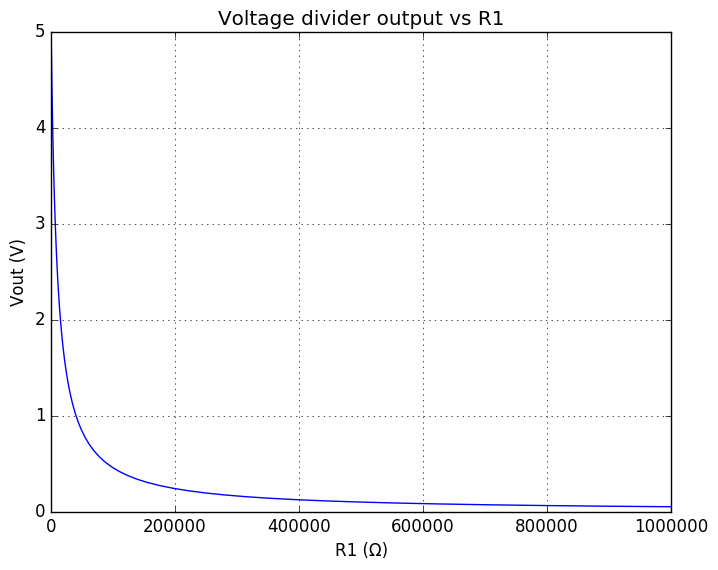

In [8]:
# change the resistance of r1 to a parameter
r1.R = :R
params = Dict(:R => 1.)
R_range = logspace(1., 6., 100)

# compute the operating point for all values of this parameter
cop = dc_sweep(circ, :R, R_range, params)

grid(b=true, which="major")
title("Voltage divider output vs R1")
xlabel("R1 (Ω)")
ylabel("Vout (V)")
plot(R_range, cop[r1.p2]);

### Example 2: Simple diode circuit

Linear circuit analysis is not so interesting, since Thevenin's theorem states that for any linear circuit there exists an equivalent circuit, with one voltage source and one resistor, which appears exactly the same as the original circuit, when looking at two nodes - so now let's examine a simple non-linear circuit. 

## Part 3: Further Work